In [1]:
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

class EndTraining(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if (logs.get('loss') < 0.1):
            print('\n\nRequired loss reached. Stopping training.')
            self.model.stop_training = True

#declare callback to stop training if loss is < 10%
endtraining = EndTraining()

In [2]:
#load data and split to train and test set
dataset = keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = dataset.load_data()
print(np.shape(x_train))

x_train = x_train/255.0
x_test = x_test/255.0


(60000, 28, 28)


In [3]:
#define model
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dense(units = 512, activation = 'relu', input_shape = (60000,784)),
        keras.layers.Dense(units = 10, activation = 'softmax', input_shape = (512,784))
])

#compile model
model.compile(optimizer = 'sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [4]:
#train model
model.fit(x_train, y_train, epochs = 100, callbacks = [endtraining])

W0714 17:31:15.430204 4513195456 deprecation.py:323] From /Users/raj4tshenoy/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 68us/sample - loss: 0.6067 - accuracy: 0.8503
Epoch 2/100
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3210 - accuracy: 0.9113
Epoch 3/100
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2723 - accuracy: 0.9240
Epoch 4/100
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2418 - accuracy: 0.9327
Epoch 5/100
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2191 - accuracy: 0.9393
Epoch 6/100
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2003 - accuracy: 0.9439
Epoch 7/100
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1843 - accuracy: 0.9488
Epoch 8/100
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1706 - accuracy: 0.9528
Epoch 9/100
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1593 - accuracy: 0.9557
Epoch

In [5]:
#test model
tl, ta = model.evaluate(x_test,y_test)
print('Test Accuracy: ',ta,'Test Loss: ', tl)







10000/10000 [==============================] - 0s 40us/sample - loss: 0.1069 - accuracy: 0.9685
Test Accuracy:  0.9685 Test Loss:  0.10685271342806518



Test the MNIST DATA:

Enter a number b/w 1 and 10000: 1214

Prediction is 1


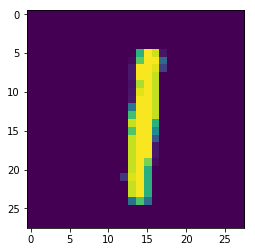

In [7]:
#Some extras
print('\nTest the MNIST DATA:\n')
n = int(input('Enter a number b/w 1 and 10000: '))
n = n-1
doraemon = model.predict(x_test)
plt.imshow(x_test[n])
print('\nPrediction is', np.argmax(doraemon[n]))